
# Panel를 활용한 데이터 시각화 및 대시보드 제작

이 노트북은 `Panel`과 `Plotly`를 사용하여 대화형 대시보드를 만드는 과정을 안내합니다. 각 섹션에는 예제와 실습이 포함되어 있어 개념을 이해하고 효과적으로 적용할 수 있도록 도와줍니다.

---

### 학습 목표:
1. Panel의 기본 개념을 이해합니다.
2. 대화형 시각화를 만드는 방법을 배웁니다.
3. 여러 요소를 결합하여 대시보드를 구축합니다.

---

**시작해봅시다!**


In [1]:
# 실습: 필요한 라이브러리 설치 (이미 설치되어 있다면 건너뛸 수 있습니다)
# !pip install panel datashader hvplot jupyter_bokeh
# pip install -r requirements.txt

### PANEL

Panel이란
- Python에서 데이터 대시보드와 웹 애플리케이션을 쉽게 생성할 수 있도록 도와주는 강력한 라이브러리입니다. 
- 데이터를 시각화하고, 대화형 위젯과 통합하며, 웹 기반 대시보드를 빠르게 개발할 수 있습니다.

Panel의 구성 요소

Pane (패널):
- 데이터를 렌더링하는 가장 기본적인 단위입니다.
- 텍스트, 이미지, 그래프, HTML, Markdown 등 다양한 형식을 표시할 수 있습니다.

Widget (위젯):
- 사용자 입력을 처리하는 인터페이스 컴포넌트입니다.
- 슬라이더, 버튼, 텍스트 입력 등 다양한 위젯이 있습니다.

Template (템플릿):
- 대시보드의 기본 레이아웃을 설정합니다.

Layout (레이아웃):
- 여러 패널과 위젯을 정렬하고 배치하는 도구입니다.

### NOTEBOOK

- `pn.extension()`은 Panel의 대화형 기능이 원활하게 작동하도록 필요한 준비 작업을 자동으로 수행하는 것입니다.
- 이 준비 작업에는 브라우저에서 필요한 리소스 로드와 설정이 포함됩니다.

In [2]:
import panel as pn
pn.extension()

EX


```PYTHON
    pn.extension(
        design="material", # UI 디자인 설정
        sizing_mode="stretch_width" # Panel 컴포넌트가 부모 컨테이너의 가로 폭 전체를 채우도록 설정
        )

        sizing_mode :
        - `fixed` : 고정 크기로 설정, 디스플레이 크기 변화에 영향을 받지 않음.
        - `stretch_height` : 높이를 부모 컨테이너 크기에 맞게 확장.
        - `stretch_both` : 가로와 세로를 모두 확장.
        - `stretch_width` : 가로 크기를 부모 컨테이너 크기에 맞게 확장
        - `scale_height, width, both` : 비율에 맞게 조정 
 

   
        디자인      특징	                            주요 사용 사례
        `Default`     심플하고 중립적인 기본 스타일        일반적인 대시보드
        `Material`    현대적이고 직관적인 UI              세련된 대화형 애플리케이션
        `Bootstrap`   널리 알려진 구조와 반응형 디자인     Bootstrap 프로젝트와의 통합
        `Fast`	    빠른 렌더링과 미니멀한 디자인        고성능 대시보드
        `Bare`	    최소한의 스타일로 사용자 정의 가능   완전 커스텀 디자인이 필요한 경우

        등등

    pn.extension('plotly') # 확장기능 추가 가능

    ex. Tabulator, Vega, MathJax 등등
```

### EDITOR

앱에 패널 구성 요소를 추가하려면 .servable()로 표시하고 `panel serve app.ipynb --dev` 를 실행하여 앱에 서비스를 제공합니다
- 코드를 수정할 때마다 애플리케이션을 업데이트 함
``` py
        
    pn.template.MaterialTemplate(
        site="Panel",
        title="Getting Started App",
        sidebar=[variable_widget, window_widget, sigma_widget],
        main=[bound_plot],
    ).servable(); 
```


### Control Flow

- Panel에서 Parameter의 값과 Parameter 객체 자체의 차이점을 이해하는 것이 중요합니다.
- 값은 특정 순간의 현재 값을 나타내는 반면, 객체는 Parameter에 대한 정보를 포함하고 시간 경과에 따른 값에 대한 참조 역할을 합니다.
- 많은 경우 Parameter 객체를 활용할 수 있으며 Panel은 값이 변경될 때 반응적으로 값을 업데이트합니다.

In [3]:
text = pn.widgets.TextInput()

text.value  # 👈 파라미터 값
text.param.value  # 👈 파라미터 객체

### Display and rendering

- Panel은 모든 선호하는 Python 라이브러리와 완벽하게 통합하고 특정 객체( DataFrame, 플로팅 Figure또는 다른 Python 객체)를 렌더링하는 방법을 자동으로 추론합니다.

- 즉, 렌더링하려는 객체를 레이아웃(예: 또는 Row) 에 손쉽게 배치할 수 있으며 Panel은 래핑할 Column적절한 유형을 자동으로 결정합니다 .
- Pane 유형에 따라 다양한 개체를 렌더링하는 방법을 알고 있을 뿐만 아니라 개체를 업데이트하거나 Vega/Altair 차트 또는 Plotly 플롯 선택과 같은 이벤트를 수신하는 방법도 제공합니다.
- 따라서 Pane 유형을 이해하는 것이 종종 유리합니다. 예를 들어, DataFramePane으로 래핑하려면 panel함수를 호출하면 자동으로 변환됩니다(이것은 렌더링할 객체가 주어졌을 때 레이아웃이 내부적으로 하는 일입니다).

In [4]:
import pandas as pd

df = pd.DataFrame({
  'A': [1, 2, 3, 4],
  'B': [10, 20, 30, 40]
})

df_pane = pn.panel(df)

In [5]:
### 객체 유형 검사 `print`
print(pn.Row(df))

Row
    [0] DataFrame(DataFrame)


- 때때로 개체에는 여러 개의 표현 중에서 선택할 수 있는 표현이 있을 수 있습니다.
- 이러한 경우 원하는 창 유형을 명시적으로 구성할 수 있습니다.

In [6]:
pn.pane.DataFrame(df)

BokehModel(combine_events=True, render_bundle={'docs_json': {'3a5b0c59-b944-42fa-a10c-21d516f99eb5': {'version…

In [7]:
pn.pane.HTML(df)

BokehModel(combine_events=True, render_bundle={'docs_json': {'75a989e6-0fa6-4114-b73e-02aba8c704ef': {'version…

In [8]:
pn.pane.Str(df)

BokehModel(combine_events=True, render_bundle={'docs_json': {'cebd9d47-341e-4e7c-a7c8-037f83771fa1': {'version…

### Widgets

여러가지 위젯 : https://panel.holoviz.org/reference/index.html#widgets

- 대화형 애플리케이션을 제작하려면 일반적으로 위젯 구성 요소(예 TextInput: , FloatSlider, 또는 Checkbox)를 애플리케이션에 추가한 다음 대화형 함수에 바인딩합니다.

##### Slider

In [9]:
import panel as pn

# panel 슬라이더
x = pn.widgets.IntSlider(name='x', start=0, end=100)

# x^2 함수
def square(x):
    return f'{x} squared is {x**2}'

# 결과 출력
pn.Row(x, pn.bind(square, x))

BokehModel(combine_events=True, render_bundle={'docs_json': {'a8278d0c-4824-43f7-bb5d-dcab40e381e2': {'version…

In [10]:
pn.bind(square, x)

<function param.reactive.bind.<locals>.wrapped(*wargs, **wkwargs)>

``` py

    pn.Row(x, pn.bind(square, x))pn.Row(x, pn.bind(square, x))

```

- `pn.Row`는 Panel의 레이아웃 컴포넌트 중 하나로, 여러 요소를 가로로 배치합니다.
- `x` 와 `pn.bind(square, x)`를 가로로 배열

- `pn.bind`는 특정 함수(square)를 호출할 때, 입력 값을 Panel 위젯(x)의 값으로 동적으로 업데이트합니다.( 바인딩 )
- `pn.bind(square, x)` x 값이 변할 때 `square값이` 변함
```

```
- 바인딩되면 이 함수를 레이아웃에 추가하거나 pn.panel 및 .servable()을 사용하여 직접 렌더링할 수 있습니다.

- 이를 통해 위젯 간의 반응성을 매우 쉽게 표현하고 출력할 수 있습니다.
- 따라서 위에 나왓던 파라미터 객체는 위젯이 되고 파라미터 값은 x 값이 되는 것입니다.

In [11]:
import panel as pn

# Panel 확장 초기화
pn.extension()

# IntSlider 위젯: 사용자가 선택할 수 있는 슬라이더 (0에서 100까지 범위)
x = pn.widgets.IntSlider(name='x', start=0, end=100)

# ColorPicker 위젯: 배경색을 선택할 수 있는 색상 선택기 (기본값은 'lightgray')
background = pn.widgets.ColorPicker(name='Background', value='lightgray')

# square 함수: 입력값(x)을 받아 그 값을 제곱한 결과를 문자열로 반환
def square(x):
    return f'{x} squared is {x**2}'

# styles 함수: 선택된 배경색(background)을 사용해 CSS 스타일 속성을 반환
def styles(background):
    return {'background-color': background, 'padding': '0 10px'}  # 배경색과 패딩 설정

# 레이아웃 정의
layout = pn.Column(
    x,  # 슬라이더 위젯 추가
    background,  # 색상 선택기 위젯 추가
    # Markdown 패널 추가 - 텍스트를 렌더링하는 컴포넌트
    # - `pn.bind(square, x)`: 슬라이더 값(x)을 기반으로 square 함수의 결과를 동적으로 갱신
    # - `styles=pn.bind(styles, background)`: 선택된 배경색(background)에 따라 스타일 동적으로 변경
    pn.pane.Markdown(pn.bind(square, x), styles=pn.bind(styles, background)),
        
    pn.pane.Markdown(pn.bind(lambda x: f"# 현재 값: {x}", x))
)

layout

BokehModel(combine_events=True, render_bundle={'docs_json': {'297d1cda-711e-4e5d-a3a5-1676533ee4f5': {'version…

##### Button

In [12]:
import panel as pn

# 버튼 위젯 생성
# name: 버튼에 표시되는 텍스트
# button_type: 버튼 스타일 (primary, secondary 등)
button = pn.widgets.Button(name='Click me', button_type='primary')

# 로딩 스피너 생성
# value: 스피너의 활성화 상태 (True: 활성화, False: 비활성화)
# size: 스피너 크기 (픽셀 단위)
indicator = pn.indicators.LoadingSpinner(value=False, size=25)

# 버튼 클릭 시 로딩 스피너 상태를 토글하는 함수 정의
def update_indicator(event):
    if not event:  # 이벤트가 없으면 함수 종료
        return
    indicator.value = not indicator.value  # 현재 상태를 반전(True <-> False)

# 이벤트 핸들러 등록
# pn.bind: 버튼 클릭 이벤트(button)를 update_indicator 함수와 연결
# watch=True: 버튼 상태 변화를 실시간으로 감지하여 함수 호출
pn.bind(update_indicator, button, watch=True)

# 버튼과 스피너를 Column 레이아웃으로 배치
pn.Column(button, indicator).servable()  # Panel 서버에서 실행 가능


BokehModel(combine_events=True, render_bundle={'docs_json': {'979eb3f7-408d-408d-9079-f0b9b40d266d': {'version…

In [13]:
pn.Row(button, indicator).servable()  # Panel 서버에서 실행 가능

BokehModel(combine_events=True, render_bundle={'docs_json': {'a4354599-9cd4-4831-a653-c5ef18388ecf': {'version…

### Panes

https://panel.holoviz.org/reference/index.html#panes

다양한 데이터 유형을 시각화하는 툴 ( 텍스트, 이미지, 플롯 등 )
- Bokeh, Matplotlib, Plotly, Altair와 같은 플롯 라이브러리.
- 이미지(JPEG, PNG, SVG), 비디오(MP4), HTML, Markdown.
- 데이터 테이블이나 JSON.

##### Bokeh : 파이썬 시각화 툴

In [14]:
import panel as pn
import numpy as np
import pandas as pd

pn.extension()

In [15]:
from math import pi  # 파이를 계산하기 위한 모듈
from bokeh.palettes import Category20c  # 파이 차트의 색상을 제공하는 팔레트
from bokeh.plotting import figure  # Bokeh 플롯 생성 모듈
from bokeh.transform import cumsum  # 누적 합 계산을 위한 유틸리티
import pandas as pd  # 데이터프레임 처리를 위한 Pandas 라이브러리
import panel as pn  # Panel로 대시보드 생성

# 데이터 정의: 국가별 값으로 구성된 딕셔너리
x = {
    'United States': 157,
    'United Kingdom': 93,
    'Japan': 89,
    'China': 63,
    'Germany': 44,
    'India': 42,
    'Italy': 40,
    'Australia': 35,
    'Brazil': 32,
    'France': 31,
    'Taiwan': 31,
    'Spain': 29
}

# 데이터프레임으로 변환 및 파이 차트를 그리기 위한 각종 계산 추가
data = pd.Series(x).reset_index(name='value').rename(columns={'index': 'country'})
# 각 데이터의 비율을 각도로 변환 (전체 값에 대한 비율로 계산)
data['angle'] = data['value'] / data['value'].sum() * 2 * pi
# 파이 차트에 사용할 색상을 팔레트에서 선택
data['color'] = Category20c[len(x)] # 20까지 가능

# Bokeh 플롯 생성
p = figure(
    height=350,  # 플롯의 높이
    title="Pie Chart",  # 제목
    toolbar_location=None,  # 툴바 위치 (없음)
    tools="hover",  # 호버링 툴팁 활성화
    tooltips="@country: @value",  # 호버링 시 표시할 정보 (국가와 값)
    x_range=(-0.5, 1.0)  # 플롯의 X축 범위
)

# 파이 차트를 그리는 wedge(쐐기) 추가
r = p.wedge(
    x=0, y=1, radius=0.4,  # 파이 차트의 중심 좌표 (0, 1)와 반지름
    start_angle=cumsum('angle', include_zero=True),  # 각 쐐기의 시작 각도
    end_angle=cumsum('angle'),  # 각 쐐기의 끝 각도
    line_color="white",  # 쐐기 경계선 색
    fill_color='color',  # 쐐기의 채우기 색상 (팔레트에서 가져옴)
    legend_field='country',  # 범례에 표시될 필드
    source=data  # 데이터 소스
)

# X축, Y축 레이블 제거
p.axis.axis_label = None
# 축 자체를 보이지 않게 설정
p.axis.visible = False
# 그리드 라인을 제거
p.grid.grid_line_color = None

# Panel에서 사용할 Bokeh Pane 생성
bokeh_pane = pn.pane.Bokeh(
    p,  # 위에서 생성한 Bokeh 플롯
    theme="dark_minimal"  # 다크 테마 적용
)

# 결과: Bokeh Pane (Panel 내에서 시각화 가능)
bokeh_pane


BokehModel(combine_events=True, render_bundle={'docs_json': {'12010db3-b465-4675-b9c5-a24a19903509': {'version…

In [16]:
from bokeh.layouts import column, row  # 레이아웃 설정을 위한 Bokeh 모듈
from bokeh.models import ColumnDataSource, Slider, TextInput  # 데이터와 위젯 정의 모듈
from bokeh.plotting import figure  # Bokeh 플롯 생성 모듈
import numpy as np  # 수학 연산을 위한 NumPy
import panel as pn  # Panel을 사용해 대시보드 생성

# Set up data
# 초기 데이터 생성
N = 200  # 데이터 포인트 수
x = np.linspace(0, 4 * np.pi, N)  # 0부터 4π까지 균등 간격으로 N개의 값 생성
y = np.sin(x)  # Sine 함수를 사용한 y 값 계산
source = ColumnDataSource(data=dict(x=x, y=y))  # Bokeh 데이터 소스 생성

# Set up plot
# 플롯 생성
plot = figure(
    height=400, width=400, title="my sine wave",  # 크기와 제목 설정
    tools="crosshair,pan,reset,save,wheel_zoom",  # 툴 추가
    x_range=[0, 4 * np.pi], y_range=[-2.5, 2.5]  # X, Y축 범위 설정
)
# 데이터 소스를 기반으로 Sine 곡선을 그리는 라인 추가
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

# Set up widgets
# 위젯 생성
text = TextInput(title="title", value='my sine wave')  # 텍스트 입력 (플롯 제목 변경용)
offset = Slider(title="offset", value=0.0, start=-5.0, end=5.0, step=0.1)  # 오프셋 슬라이더
amplitude = Slider(title="amplitude", value=1.0, start=-5.0, end=5.0, step=0.1)  # 진폭 슬라이더
phase = Slider(title="phase", value=0.0, start=0.0, end=2 * np.pi)  # 위상 슬라이더
freq = Slider(title="frequency", value=1.0, start=0.1, end=5.1, step=0.1)  # 주파수 슬라이더

# Set up callbacks
# 텍스트 입력 위젯과 플롯 제목 연결
def update_title(attrname, old, new):
    plot.title.text = text.value  # 텍스트 입력 값을 플롯 제목으로 업데이트

text.on_change('value', update_title)  # 텍스트 변경 시 update_title 함수 실행

# 슬라이더 값 변경 시 데이터 업데이트
def update_data(attrname, old, new):
    # 슬라이더 값 가져오기
    a = amplitude.value  # 진폭
    b = offset.value  # 오프셋
    w = phase.value  # 위상
    k = freq.value  # 주파수

    # 새로운 Sine 곡선 데이터 생성
    x = np.linspace(0, 4 * np.pi, N)  # x 값 재계산
    y = a * np.sin(k * x + w) + b  # 슬라이더 값 반영하여 y 값 계산

    source.data = dict(x=x, y=y)  # 업데이트된 데이터를 ColumnDataSource에 전달

# 각 슬라이더에 데이터 업데이트 콜백 등록
for w in [offset, amplitude, phase, freq]:
    w.on_change('value', update_data)

# Set up layouts and add to document
# 입력 위젯과 플롯을 레이아웃에 배치
inputs = column(text, offset, amplitude, phase, freq)  # 입력 위젯을 세로로 배치
layout = row(inputs, plot, width=800)  # 입력 위젯과 플롯을 가로로 배치

# Panel을 사용해 Bokeh 애플리케이션을 Pane으로 감싸기
bokeh_app = pn.pane.Bokeh(layout)

# 결과: Panel 내에서 Bokeh 인터랙티브 플롯 표시
bokeh_app


BokehModel(combine_events=True, render_bundle={'docs_json': {'8bf49f09-8ae3-4f53-ab66-1630981262c5': {'version…

##### PNG

In [17]:
png_pane = pn.pane.PNG('https://assets.holoviz.org/panel/samples/png_sample.png')
png_pane

BokehModel(combine_events=True, render_bundle={'docs_json': {'8ad98bb1-da3c-4e69-b843-a4b8fb3deb31': {'version…

### Templates

대시보드 애플리케이션을 빠르고 효율적으로 디자인할 수 있도록 도와주는 프레임워크


템플릿 종류
 - `MaterialTemplate`	: Google Material Design, 스타일 현대적이고 직관적인 UI
 - `VanillaTemplate` : 커스터마이징 가능한 기본 HTML, 완전히 사용자 정의된 디자인
 - `FastListTemplate` : 반응형 리스트 레이아웃, 모바일 및 간단한 대시보드
 - `FastGridTemplate` : MaterialTemplate, VanillaTemplate 달리 그리드에서 구성요소의 크기를 조정하고 재정렬 가능
 - `GoldenTemplate` : 복잡한 다중 창 레이아웃, 복잡한 대시보드
 - `BootstrapTemplate` : Bootstrap 스타일, Bootstrap 기반 디자인 사용
 - `ReactTemplate` : React.js 스타일, 현대적인 SPA 스타일 애플리케이션

Launching server at http://localhost:53247


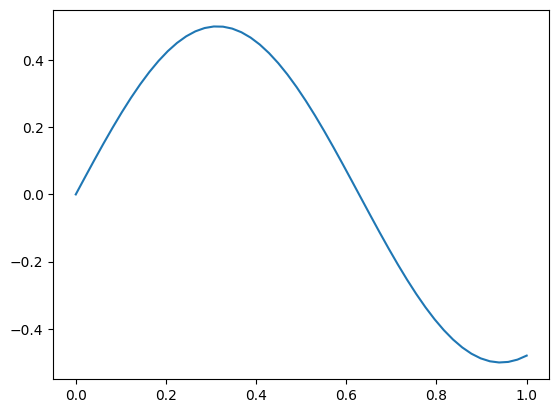

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import panel as pn
import hvplot.pandas  # Interactive plots

# Panel 확장 로드 및 Material 템플릿 사용
pn.extension(template='material')

# 주파수(Frequency) 슬라이더 생성
# 시작값: 0, 끝값: 10, 초기값: 5
freq = pn.widgets.FloatSlider(
    name='Frequency', start=0, end=10, value=5
).servable(target='sidebar')  # 슬라이더를 MaterialTemplate의 사이드바에 추가

# 진폭(Amplitude) 슬라이더 생성
# 시작값: 0, 끝값: 1, 초기값: 0.5
ampl = pn.widgets.FloatSlider(
    name='Amplitude', start=0, end=1, value=0.5
).servable(target='sidebar')  # 슬라이더를 MaterialTemplate의 사이드바에 추가

# Sine 곡선을 그리는 함수 정의
def plot(freq, ampl):
    fig = plt.figure()  # 새로운 Matplotlib figure 생성
    ax = fig.add_subplot(111)  # 단일 플롯 생성
    xs = np.linspace(0, 1)  # 0부터 1까지 균일한 간격의 x 값 생성
    ys = np.sin(xs * freq) * ampl  # 주어진 주파수(freq)와 진폭(ampl)을 사용해 y 값 계산
    ax.plot(xs, ys)  # Sine 곡선 플롯
    return fig  # Matplotlib figure 반환

# Matplotlib 플롯을 Panel에 표시하기 위한 Pane 생성
# pn.bind를 사용해 슬라이더 값을 plot 함수에 바인딩
mpl = pn.pane.Matplotlib(
    pn.bind(plot, freq, ampl),  # plot 함수에 freq, ampl 슬라이더 연결
    sizing_mode='stretch_width'  # 가로 폭을 부모 컨테이너에 맞게 확장
)

# MaterialTemplate 생성 및 구성
pn.template.MaterialTemplate(
    site="Panel",           # 사이트 이름 설정
    title="Sine curve",     # 대시보드 제목
    sidebar=[freq, ampl],   # 사이드바에 두 슬라이더 추가
    main=[mpl],             # 메인 영역에 Matplotlib 플롯 추가
).servable().show()         # 대시보드 실행


In [19]:
# Panel 확장 로드
pn.extension(sizing_mode="stretch_width")

# 샘플 데이터
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [10, 20, 15, 25]
})

# 플롯 생성
bar_plot = data.hvplot.bar(x='Category', y='Values', title="Sample Bar Plot")

# 위젯 생성
slider = pn.widgets.IntSlider(name="Adjust Value", start=0, end=100, step=5)
table = pn.widgets.DataFrame(data, name="Data Table", height=200)

# FastGridTemplate 생성
template = pn.template.FastGridTemplate(
    title="FastGridTemplate Example",
    site="My Dashboard",
    logo="https://via.placeholder.com/150",  # 로고 URL
    sidebar=[slider],  # 사이드바 콘텐츠
    sidebar_footer="<p>Footer content here</p>",  # 사이드바 하단 HTML
    theme="dark",  # 다크 테마
    accent_base_color="#F08080",  # 강조 색상
)

# main에 위치 및 크기 지정
template.main[0:3, 0:8] = pn.Card(bar_plot, title="Bar Plot", background="#FFFFFF")  # 첫 3행, 8열
template.main[3:6, 0:2] = pn.Card(slider, title="Slider Widget", background="#E8E8E8")  # 다음 3행, 2열
template.main[3:6, 2:4] = pn.Card(table, title="Data Table", background="#F5F5F5")  # 다음 3행, 나머지 2열

# 대시보드 실행
template.show()


TypeError: Card.__init__() got an unexpected keyword argument 'background'

### APP Gallery

###### penguin

In [20]:
import numpy as np
import pandas as pd
import panel as pn

import holoviews as hv
import hvplot.pandas # noqa

pn.extension(template='fast')

pn.state.template.logo = 'https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/logo.png'

In [21]:
# 사이드바에 표시할 환영 메시지
welcome = "## Welcome and meet the Palmer penguins!"

# 사이드바에 표시할 이미지 (펭귄 그림)
penguins_art = pn.pane.PNG(
    'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/man/figures/palmerpenguins.png', 
    height=160  # 이미지 높이 지정
)

# 이미지 제작자에 대한 크레딧
credit = "### Artwork by @allison_horst"

# 사용자에게 대시보드 사용법 설명
instructions = """
Use the box-select and lasso-select tools to select a subset of penguins
and reveal more information about the selected subgroup through the power
of cross-filtering.
"""

# 데이터의 라이선스 정보
license = """
### License

Data are available by CC-0 license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data."
"""

# 위에서 정의한 구성 요소들을 하나의 Column에 추가하여 사이드바 생성
art = pn.Column(
    welcome,             # 환영 메시지
    penguins_art,        # 펭귄 그림
    credit,              # 크레딧 정보
    instructions,        # 대시보드 사용법
    license,             # 라이선스 정보
    sizing_mode='stretch_width'  # 사이드바의 너비를 화면 너비에 맞게 늘림
).servable(area='sidebar')  # 'sidebar' 영역으로 설정하여 대시보드에 표시 가능하게 만듦

# 생성된 사이드바를 반환
art


BokehModel(combine_events=True, render_bundle={'docs_json': {'5789c604-529f-4176-a216-0e125242a743': {'version…

In [22]:
# pandas 라이브러리를 사용하여 CSV 파일을 불러옴
penguins = pd.read_csv('https://datasets.holoviz.org/penguins/v1/penguins.csv')

# 결측치 제거: 'sex' 열에서 값이 비어있는(null) 행들을 제외하고 데이터프레임 재정의
penguins = penguins[~penguins.sex.isnull()]  # ~ 연산자는 not을 의미

# 데이터프레임의 인덱스를 초기화하고, 'species' 열을 기준으로 정렬
penguins = penguins.reset_index().sort_values('species')

# 데이터프레임의 첫 5개 행 출력
penguins.head()


,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
94,100,Adelie,Biscoe,35.0,17.9,192.0,3725.0,female,2009
95,101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,male,2009
96,102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,female,2009
97,103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,male,2009


In [32]:
# Holoviews의 link_selections를 사용해 선택된 데이터 항목을 추적하기 위한 인스턴스 생성
ls = hv.link_selections.instance()

# 선택된 데이터의 수를 세고, 전체 데이터 중에서 몇 개가 선택되었는지 표시하는 함수 정의
def count(selected):
    return f"## {len(selected)}/{len(penguins)} penguins selected"
    # len(selected): 현재 선택된 데이터의 수
    # len(penguins): 전체 데이터(펭귄 데이터셋)의 수

# Panel의 Markdown 패널 생성
# 선택된 데이터를 기반으로 count 함수를 동적으로 업데이트
selected = pn.pane.Markdown(
    pn.bind(count, ls.selection_param(penguins)),  # link_selections와 데이터셋을 연결
    align='center',  # 텍스트를 수평 중앙 정렬
    width=400,       # Markdown 패널의 너비를 400px로 설정
    margin=(0, 100, 0, 0)  # 상단, 우측, 하단, 좌측 여백 설정
)

# 헤더 구성 요소 정의
header = pn.Row(
    pn.layout.HSpacer(),  # 왼쪽에 빈 공간 추가 (헤더를 오른쪽 정렬)
    selected,             # 동적 Markdown 패널 추가
    sizing_mode='stretch_width'  # 부모 컨테이너 너비에 맞게 요소를 늘림
).servable(area='header')  # 'header' 영역에 표시되도록 설정

# 생성된 Markdown 패널 반환
selected


BokehModel(combine_events=True, render_bundle={'docs_json': {'b83056d9-1dd7-4b65-841a-d4f4e2382166': {'version…

In [24]:
# 펭귄 종에 따른 색상 매핑 정의
colors = {
    'Adelie': '#1f77b4',  # 파란색
    'Gentoo': '#ff7f0e',  # 주황색
    'Chinstrap': '#2ca02c'  # 녹색
}

# 산점도(Scatter plot) 생성
scatter = penguins.hvplot.points(
    'bill_length_mm', 'bill_depth_mm',  # X축: 부리 길이, Y축: 부리 깊이
    c='species',                        # 색상을 펭귄 종에 따라 설정
    cmap=colors,                        # 색상 매핑 적용
    responsive=True,                    # 그래프가 부모 컨테이너 크기에 따라 동적으로 조정
    min_height=300                      # 최소 높이 300픽셀 설정
)

# 히스토그램(Histogram) 생성
histogram = penguins.hvplot.hist(
    'body_mass_g',                      # X축: 몸무게 (g)
    by='species',                       # 펭귄 종별로 히스토그램 그룹화
    color=hv.dim('species').categorize(colors),  # 색상 매핑
    legend=False,                       # 범례 표시 안 함
    alpha=0.5,                          # 히스토그램의 투명도 설정
    responsive=True,                    # 그래프 크기 동적 조정
    min_height=300                      # 최소 높이 300픽셀 설정
)

# 막대 그래프(Bar plot) 생성
bars = penguins.hvplot.bar(
    'species', 'index',                 # X축: 펭귄 종, Y축: 인덱스 값
    c='species',                        # 색상을 펭귄 종에 따라 설정
    cmap=colors,                        # 색상 매핑 적용
    responsive=True,                    # 그래프 크기 동적 조정
    min_height=300,                     # 최소 높이 300픽셀 설정
    ylabel=''                           # Y축 라벨 제거
).aggregate(function=np.count_nonzero)  # 각 종별 개수 계산하여 막대 그래프 생성

# 바이올린 플롯(Violin plot) 생성
violin = penguins.hvplot.violin(
    'flipper_length_mm',                # X축: 날개 길이 (mm)
    by=['species', 'sex'],              # 펭귄 종 및 성별별로 그룹화
    cmap='Category20',                  # 색상 매핑 (Category20 컬러 팔레트)
    responsive=True,                    # 그래프 크기 동적 조정
    min_height=300,                     # 최소 높이 300픽셀 설정
    legend='bottom_right'               # 범례를 그래프 오른쪽 아래에 배치
).opts(split='sex')                     # 성별로 그래프를 나누어 표시

# 시각화들을 Panel에 결합하여 대시보드로 표시
plots = pn.pane.HoloViews(
    ls(                                # 선택 도구를 활성화 (link_selections)
        scatter.opts(show_legend=False) +  # 산점도 (범례 숨김)
        bars +                          # 막대 그래프
        histogram +                     # 히스토그램
        violin                         # 바이올린 플롯
    ).opts(sizing_mode='stretch_both')  # 그래프 크기를 컨테이너에 맞게 조정
    .cols(2)                            # 그래프를 2열로 배치
).servable(title='Palmer Penguins')     # 'Palmer Penguins' 대시보드 생성

# 생성된 대시보드 반환
plots


BokehModel(combine_events=True, render_bundle={'docs_json': {'3ca43e32-6d26-4582-88b3-683c88f551fa': {'version…

In [ ]:
# MaterialTemplate 생성 및 구성
pn.template.FastListTemplate(
    site="Palmer Penguins",
    # site_logo = pn.state.template.logo ,  # 로고 URL
    title='',  # 사이트 이름 설정
    sidebar=art,  # 사이드바에 두 슬라이더 추가
    main=plots,
    header=header  # 메인 영역에 Matplotlib 플롯 추가
).servable().show()  # 대시보드 실행


Launching server at http://localhost:53480


ERROR:bokeh.core.validation.check:E-1006 (NON_MATCHING_DATA_SOURCES_ON_LEGEND_ITEM_RENDERERS): LegendItem.label is a field, but renderer data sources don't match: LegendItem(id='742c42ef-8dc8-429a-a90b-4c804bebecb8', ...)
ERROR:bokeh.core.validation.check:E-1006 (NON_MATCHING_DATA_SOURCES_ON_LEGEND_ITEM_RENDERERS): LegendItem.label is a field, but renderer data sources don't match: LegendItem(id='d2e8d35e-df0d-450f-8186-e268e88778a6', ...)


##### Windturbines

In [ ]:
# pip install datashader
# pip install pyarrow

In [26]:
import holoviews as hv
import panel as pn
import pandas as pd
import hvplot.pandas

pn.extension('vizzu', 'tabulator', design='material', template='material')

windturbines = pn.state.as_cached(
    'windturbines',
    pd.read_parquet,
    path='https://datasets.holoviz.org/windturbines/v1/windturbines.parq'
)

windturbines.head()

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,retrofit,retrofit_year,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,easting,northing
0,3072661,None,None,5149.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,0,NaN,2,3,2018-05-08,Digital Globe,-118.363762,35.077908,-1.317619e+07,4.174474e+06
1,3072695,None,None,5143.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,0,NaN,2,3,2018-05-08,Digital Globe,-118.364410,35.077435,-1.317627e+07,4.174409e+06
2,3072704,None,None,5146.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,0,NaN,2,3,2018-05-08,Digital Globe,-118.364197,35.077644,-1.317624e+07,4.174438e+06
3,3063272,19-028134,2014-WTE-4084-OE,NaN,NaN,IA,Story County,19169,30 MW Iowa DG Portfolio,2017.0,...,0,NaN,3,3,2017-04-24,Digital Globe,-93.430367,42.028233,-1.040062e+07,5.165210e+06
4,3053390,19-028015,2015-WTE-6386-OE,NaN,NaN,IA,Boone County,19015,30 MW Iowa DG Portfolio,2017.0,...,0,NaN,3,3,2017-06-01,Digital Globe,-93.700424,41.977608,-1.043068e+07,5.157626e+06


In [ ]:
def data(df, groupby, quant):
    """
    데이터 처리 함수
    - 'Count'가 선택된 경우, groupby 기준으로 데이터 개수를 반환
    - 그 외에는 groupby 기준으로 quant 합계를 반환
    """
    if quant == 'Count':
        return df.value_counts(groupby).to_frame(name='Count').sort_index().reset_index().iloc[:50]
    else:
        return df.groupby(groupby)[quant].sum().reset_index().iloc[:50]

def config(chart_type, groupby, quant):
    """
    차트 설정 함수
    - 'Bubble Chart' 선택 시, 버블 차트 설정 반환
    - 그 외에는 막대 차트 설정 반환
    """
    if chart_type == 'Bubble Chart':
        return {
            "channels": {
                "x": None,
                "y": None,
                "color": groupby,
                "label": groupby,
                "size": quant
            },
            'geometry': 'circle'
        }
    else:
        return {
            "channels": {
                "x": groupby,
                "y": quant,
                "color": None,
                "label": None,
                "size": None
            },
            'geometry': 'rectangle'
        }

# Selection link instance
ls = hv.link_selections.instance()
# hv.link_selections 객체 생성
# - 사용자가 시각화에서 데이터를 선택하면, 해당 선택을 다른 시각화 요소와 동기화

# 지리적 데이터 시각화 설정
geo = ls(windturbines.hvplot.points(
    'easting', 'northing',  # x축과 y축에 사용할 데이터 열 지정
    xaxis=None, yaxis=None,  # x축과 y축 비활성화
    rasterize=True,  # 대규모 데이터를 처리하기 위해 래스터화
    tiles='CartoLight',  # 지도 타일 스타일 지정
    responsive=True,  # 반응형 크기 조정 활성화
    dynspread=True,  # 데이터 밀도에 따라 점 크기 자동 조정
    height=500,  # 지도 높이 설정
    width=1170,  # 지도 너비 설정
    cnorm='log',  # 컬러 매핑을 로그 스케일로 설정
    cmap='plasma',  # 컬러맵 설정
    xlim=(-14000000, -8000000),  # x축 범위 설정 (지도의 경도 범위)
    ylim=(3000000, 6500000)  # y축 범위 설정 (지도의 위도 범위)
)).opts(
    tools=[],  # 툴바 비활성화 (줌, 이동 등 인터랙션 도구 숨김)
    toolbar=None,  # 전체 툴바 제거
)

# 위젯: 그룹 기준 선택
groupby = pn.widgets.RadioButtonGroup(
    options={'State': 't_state', 'Year': 'p_year', 'Manufacturer': 't_manu'}, align='center'
)
# 위젯: 차트 타입 선택
chart_type = pn.widgets.RadioButtonGroup(
    options=['Bar Chart', 'Bubble Chart'], align='center'
)
# 위젯: 데이터 양적 선택
quant = pn.widgets.RadioButtonGroup(
    options={'Count': 'Count', 'Capacity': 'p_cap'}, align='center'
)

# 선택된 데이터 필터링
lsdata = ls.selection_param(windturbines)
# 지도의 선택된 데이터와 동기화하여 필터링된 데이터를 가져옴
# 사용자가 지도의 특정 영역을 선택하면 해당 영역의 데이터만 반환
# Vizzu 차트 설정
vizzu = pn.pane.Vizzu(
    pn.bind(data, lsdata, groupby, quant),
    config=pn.bind(config, chart_type, groupby, quant),
    column_types={'p_year': 'dimension'},
    style={
        "plot": {
            "xAxis": {
                "label": {
                    "angle": "-45deg"  # X축 라벨 기울기 설정
                }
            }
        }
    },
    sizing_mode='stretch_both'
)

def format_df(df):
    """
    데이터프레임 포맷팅 함수
    - 특정 열만 선택
    - 열 이름을 사람이 읽기 쉽게 변경
    """
    df = df[['t_state', 't_county', 'p_name', 'p_year', 't_manu', 't_cap']]
    return df.rename(
        columns={col: col.split('_')[1].title() for col in df.columns}
    )

# 데이터 테이블 설정
table = pn.widgets.Tabulator(
    pn.bind(format_df, lsdata), page_size=8, pagination='remote', 
    show_index=False,
    # sizing_mode='stretch_width'
)

# 텍스트를 스타일링해 글자색 변경
header_text = pn.Row(
    quant,
    pn.pane.Markdown(
        f"<span style='color:white; font-size:16px; text-align:left;'>by</span>",
        width=200, 
        sizing_mode='fixed'
    ),
    groupby,
    pn.pane.Markdown(
        f"<span style='color:white; font-size:16px; text-align:left;'>as a</span>",
        width=200, 
        sizing_mode='fixed'
    ),
    chart_type,
    pn.Spacer(width=500),
)

# FastListTemplate 생성
template = pn.template.MaterialTemplate(
    title="Windturbines",  # 템플릿 제목
    header=header_text,  # 헤더에 스타일링된 텍스트 포함
    main=[  # 메인 콘텐츠
        pn.Column(
            pn.Row(geo, table, sizing_mode='stretch_width'),
            vizzu, min_height=1000,
            sizing_mode='stretch_both'
        )
    ]
).show()


c:\Users\82105\miniconda3\Lib\site-packages\dask\dataframe\__init__.py:49: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




Launching server at http://localhost:53557


### Ladybug Dashboard

In [28]:
import panel as pn
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import hvplot.pandas

ACCENT = "#BB2649"
RED = "#D94467"
GREEN = "#5AD534"

CSV_FILE = "data/ladybug_final.csv"

pn.extension("plotly", "tabulator", sizing_mode="stretch_width")

In [29]:
############### 0. 데이터 불러오기 ###############
@pn.cache #  데이터가 클 때 사용하면 항상 같은 데이터를 불러옴
def get_data():
    return pd.read_csv(CSV_FILE)

data = get_data()

In [30]:
############### 1. 무당이와 도보의 비율 및 수량 (파이 차트) ###############
mode_counts = data['transportation'].value_counts()

def create_pie_chart(counts):
    fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values, hole=0.3)])
    fig.update_layout(title="무당이와 도보의 비율", template="plotly_dark", width=400, height=400)
    return fig

mode_ratio_chart = pn.pane.Plotly(create_pie_chart(mode_counts))

In [ ]:
############### 2. 무당이와 도보 평균 통행 시간 ###############

# 사용자 정의 색상 설정
colors = {'ladybug': 'blue', 'foot': 'red'}

avg_time = data.copy()

avg_time['duration'] = avg_time.apply(
    lambda row: row['ladybug_total_duration'] if row['transportation'] == 'ladybug' else row['foot_total_duration'],
    axis=1
)

avg_time_chart_data = avg_time.groupby('transportation')['duration'].mean().reset_index()

# Plotly 막대 그래프 생성
fig = go.Figure()

# 막대 추가 (각 이동 방식에 대해)
for transport in ['ladybug', 'foot']:
    filtered_data = avg_time_chart_data[avg_time_chart_data['transportation'] == transport]
    fig.add_trace(
        go.Bar(
            x=filtered_data['transportation'],
            y=filtered_data['duration'],
            name=transport.capitalize(),  # 범례 이름 설정
            marker=dict(color=colors[transport])  # 색상 지정
        )
    )

# 레이아웃 설정
fig.update_layout(
    title="평균 통행 시간 (분)",
    xaxis=dict(title="이동 방식"),
    yaxis=dict(title="평균 통행 시간 (분)"),
    barmode='group',  # 막대를 그룹화
    legend=dict(title="Transportation", x=1.05, y=1),  # 범례 위치 및 제목 설정
    template='plotly_dark',  # 다크 테마
    width=400,
    height=400
)

# Panel에서 사용하기 위한 Plotly Pane 생성
avg_time_chart = pn.pane.Plotly(fig)

In [ ]:

############### 3. 무당이와 도보 평균 통행 거리 비교 ###############
avg_distance = data.copy()

# 이동 속도 (m/min)
foot_speed_m_min = 5 * (1000 / 60)  # 도보 속도
ladybug_speed_m_min = 17 * (1000 / 60)  # 무당벌레 속도

# 거리 계산 (미터 단위로 변환)
avg_distance['distance'] = avg_distance.apply(
    lambda row: row['ladybug_total_duration'] * ladybug_speed_m_min
    if row['transportation'] == 'ladybug'
    else row['foot_total_duration'] * foot_speed_m_min,
    axis=1
)

avg_distance_chart_data = avg_distance.groupby('transportation')['distance'].mean().reset_index()

# Plotly 막대 그래프 생성
fig = go.Figure()

# 막대 추가 (각 이동 방식에 대해)
for transport, color in zip(['ladybug', 'foot'], ['blue', 'red']):
    filtered_data = avg_distance_chart_data[avg_distance_chart_data['transportation'] == transport]
    fig.add_trace(
        go.Bar(
            x=filtered_data['transportation'],
            y=filtered_data['distance'],
            name=transport.capitalize(),  # 범례 이름 설정
            marker=dict(color=color)  # 색상 지정
        )
    )

# 레이아웃 설정
fig.update_layout(
    title="평균 통행 거리 (m)",
    xaxis=dict(title="이동 방식"),
    yaxis=dict(title="평균 통행 거리 (m)"),
    barmode='group',  # 막대를 그룹화
    template='plotly_dark',  # 다크 테마
    width=400,
    height=400
)

# Panel에서 사용하기 위한 Plotly Pane 생성
avg_distance_chart = pn.pane.Plotly(fig)

In [ ]:
############### 4. 시간별 인원수 계산 ###############
data['hour'] = data['start_time'].apply(lambda x: int(x // 60))
hourly_count = data.groupby('hour').size().reset_index(name='count')

# Plotly 선 그래프 생성
fig = go.Figure()

# 선 그래프 추가
fig.add_trace(
    go.Scatter(
        x=hourly_count['hour'],
        y=hourly_count['count'],
        mode='lines',  # 선 그래프
        line=dict(color='blue', width=2),  # 선 색상과 두께
        name='Line'
    )
)

# 산점도 추가
fig.add_trace(
    go.Scatter(
        x=hourly_count['hour'],
        y=hourly_count['count'],
        mode='markers',  # 점만 표시
        marker=dict(color='red', size=10),  # 점 색상과 크기
        name='Scatter'
    )
)

# 레이아웃 설정
fig.update_layout(
    title="시간별 인원수",
    xaxis=dict(title="시간대 (시)", range=[9, 18]),  # x축 범위 설정
    yaxis=dict(title="인원수"),
    template='plotly_dark',  # 다크 테마
    width=400,
    height=400
)

# Panel에서 사용하기 위한 Plotly Pane 생성
hourly_count_chart = pn.pane.Plotly(fig)

In [ ]:
############## 5. 데이터 테이블
data_table = pn.widgets.Tabulator(
    data,
    pagination="remote",
    page_size=6,
    layout="fit_data_fill"
)

In [ ]:
############### 대시보드 생성 함수 ###############
def create_dashboard():
    grid = pn.GridSpec(sizing_mode='scale_both', max_width=1200)
    grid[0:3, 0:3] = mode_ratio_chart
    grid[0:3, 3:6] = hourly_count_chart
    grid[0:3, 6:9] = avg_distance_chart
    grid[0:3, 9:12] = avg_time_chart
    grid[3:5, :] = data_table

    dashboard = pn.template.FastGridTemplate(
        title="무당이 대시보드",
        accent_base_color=ACCENT,
        header_background=ACCENT,
        prevent_collision=True,
        save_layout=True,
        theme_toggle=False,
        theme='dark',
        main=grid,
    )

    return dashboard

############### 대시보드 실행 ###############
dashboard = create_dashboard()
# dashboard.servable()
dashboard.show()

Launching server at http://localhost:56665


In [ ]:
############### 대시보드 저장 ###############
dashboard.save('docs/index.html')

### 깃허브에 호스팅